<a href="https://colab.research.google.com/github/Scholokhov/MLJourney/blob/main/LinRegProg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import torch
import numpy
from torch import nn
import matplotlib.pyplot as plt

In [128]:
weight = 0.6
bias = 0.2

start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.2000],
         [0.2060],
         [0.2120],
         [0.2180],
         [0.2240],
         [0.2300],
         [0.2360],
         [0.2420],
         [0.2480],
         [0.2540]]),
 100,
 100)

In [129]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test)

20

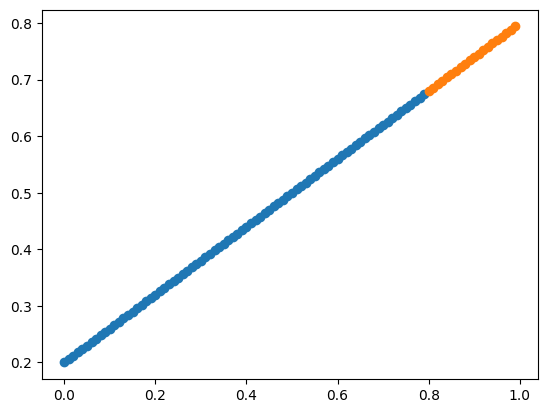

In [130]:
def plot_predictions(train_data = X_train,
                     train_visual = y_train,
                     test_data = X_test,
                     test_visual = y_test,
                     predictions = None):
  plt.scatter(train_data, train_visual, label = "Train Data")
  plt.scatter(test_data, test_visual, label = "Test Data")

  if predictions is not None:
    plt.scatter(test_data, predictions)
plot_predictions()

In [131]:
class LinearRegressionModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype = torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [132]:
torch.manual_seed = 42
model_alpha = LinearRegressionModel()
list(model_alpha.parameters()), model_alpha.state_dict()

([Parameter containing:
  tensor([1.3221], requires_grad=True),
  Parameter containing:
  tensor([0.8172], requires_grad=True)],
 OrderedDict([('weights', tensor([1.3221])), ('bias', tensor([0.8172]))]))

In [133]:
with torch.inference_mode():
  y_preds = model_alpha(X_test)
len(y_preds), len(y_test)

(20, 20)

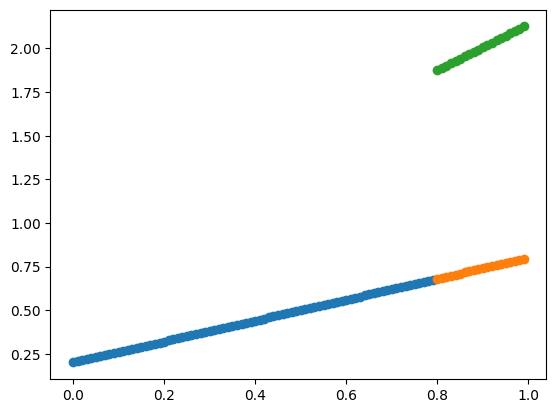

In [134]:
plot_predictions(predictions = y_preds)

In [135]:
MAE = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_alpha.parameters(),
                            lr = 0.01)

In [136]:
epochs = 1000

for epoch in range(epochs):
  model_alpha.train()

  y_pred = model_alpha(X_test)

  loss = MAE(y_pred, y_test)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_alpha.eval()
  with torch.inference_mode():
    test_pred = model_alpha(X_test)
    test_loss = MAE(test_pred, y_test)
    if epoch % 10 == 0:
      print(f"Epoch count:{epoch} Loss value:{loss}, test loss value:{test_loss}")
print(model_alpha.state_dict())

Epoch count:0 Loss value:1.263500690460205, test loss value:1.245490312576294
Epoch count:10 Loss value:1.0833983421325684, test loss value:1.0653879642486572
Epoch count:20 Loss value:0.9032958745956421, test loss value:0.8852856755256653
Epoch count:30 Loss value:0.7231935858726501, test loss value:0.7051833868026733
Epoch count:40 Loss value:0.5430912375450134, test loss value:0.5250809788703918
Epoch count:50 Loss value:0.36298879981040955, test loss value:0.3449786305427551
Epoch count:60 Loss value:0.18288642168045044, test loss value:0.16487619280815125
Epoch count:70 Loss value:0.005186605267226696, test loss value:0.005116456653922796
Epoch count:80 Loss value:0.004669064190238714, test loss value:0.004743710160255432
Epoch count:90 Loss value:0.005097446031868458, test loss value:0.005110320635139942
Epoch count:100 Loss value:0.006693211384117603, test loss value:0.007863071747124195
Epoch count:110 Loss value:0.008519682101905346, test loss value:0.009490558877587318
Epoch 

In [137]:
with torch.inference_mode():
  new_y_preds = model_alpha(X_test)

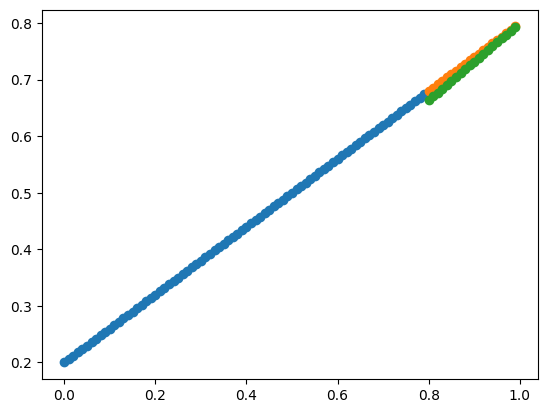

In [138]:
plot_predictions(predictions=new_y_preds)